Implement fuzzy set union and intersection of 2 fuzzy sets A and B such that A and B have values taken as user input and in range [10, 200].
Assign membership values to each element randomly in range [0, 1].

In [1]:
import random

def get_mu_val():
  return round(random.uniform(0, 1), 1)


def get_fuzzy_set(name, start, end, size, input_fn):
    fzset = [0 for i in range(size)]
    mu = [get_mu_val() for i in range(size)]
    i = 0
    while i < size:
        fzset[i] = input_fn()
        if fzset[i] < start or fzset[i] > end:
            print(f"  {name}[{i}] = {fzset[i]} out of range [{start}, {end}]")
            continue
        i += 1
    print()
    return fzset, mu

In [2]:
def fuzzy_set_generic(A, mu_A, B, mu_B, comparator, visited):
    A_union_B = []
    mu_A_union_B = []
    for i in range(len(A)):
        if visited[A[i]]: continue
        elA, muA = A[i], mu_A[i]
        indexB, elB, muB = None, None, None
        try:
            indexB = B.index(elA)
            elB = B[indexB]
            muB = mu_B[indexB]
        except ValueError:
            indexB = None
            elB = None
            muB = 0
        if indexB == None:
            A_union_B.append(elA)
            mu_A_union_B.append(muA)
        else:
            A_union_B.append(elA)
            mu_A_union_B.append(comparator(muA, muB))
        visited[elA] = True
    return A_union_B, mu_A_union_B

In [3]:
def fuzzy_set_union(A, mu_A, B, mu_B):
    visited = { A[i] : False for i in range(len(A)) }
    visited.update({ B[i] : False for i in range(len(B)) })
    A_inter_B, mu_A_inter_B = fuzzy_set_generic(A, mu_A, B, mu_B, max, visited)
    B_inter_A, mu_B_inter_A = fuzzy_set_generic(B, mu_B, A, mu_A, max, visited)
    return A_inter_B + B_inter_A, mu_A_inter_B + mu_B_inter_A


def fuzzy_set_intersection(A, mu_A, B, mu_B):
    visited = { A[i] : False for i in range(len(A)) }
    visited.update({ B[i] : False for i in range(len(B)) })
    A_inter_B, mu_A_inter_B = fuzzy_set_generic(A, mu_A, B, mu_B, min, visited)
    B_inter_A, mu_B_inter_A = fuzzy_set_generic(B, mu_B, A, mu_A, min, visited)
    return A_inter_B + B_inter_A, mu_A_inter_B + mu_B_inter_A

In [4]:
start_range = 10
end_range = 200

n_A = 10 # int(input("enter set A size: "))
n_B = 10 # int(input("enter set B size: "))

def inpfn():
    return random.randint(10, 200) # int(input("enter element: "))

A, mu_A = get_fuzzy_set("A", start_range, end_range, n_A, inpfn)
B, mu_B = get_fuzzy_set("B", start_range, end_range, n_B, inpfn)

print("Fuzzy Set A:", A, mu_A)
print("Fuzzy Set B:", B, mu_B)

AuB, mu_AuB = fuzzy_set_union(A, mu_A, B, mu_B)
print("\nFuzzy Set Union:", AuB, mu_AuB)

AnB, mu_AnB = fuzzy_set_intersection(A, mu_A, B, mu_B)
print("Fuzzy Set Intersection:", AnB, mu_AnB)



Fuzzy Set A: [137, 78, 130, 167, 35, 171, 140, 124, 148, 197] [0.0, 0.2, 0.5, 0.8, 0.7, 0.0, 0.9, 0.9, 0.5, 0.8]
Fuzzy Set B: [133, 95, 155, 57, 28, 92, 117, 23, 180, 162] [0.4, 0.7, 0.0, 0.1, 0.6, 0.1, 0.0, 0.0, 0.4, 0.8]

Fuzzy Set Union: [137, 78, 130, 167, 35, 171, 140, 124, 148, 197, 133, 95, 155, 57, 28, 92, 117, 23, 180, 162] [0.0, 0.2, 0.5, 0.8, 0.7, 0.0, 0.9, 0.9, 0.5, 0.8, 0.4, 0.7, 0.0, 0.1, 0.6, 0.1, 0.0, 0.0, 0.4, 0.8]
Fuzzy Set Intersection: [137, 78, 130, 167, 35, 171, 140, 124, 148, 197, 133, 95, 155, 57, 28, 92, 117, 23, 180, 162] [0.0, 0.2, 0.5, 0.8, 0.7, 0.0, 0.9, 0.9, 0.5, 0.8, 0.4, 0.7, 0.0, 0.1, 0.6, 0.1, 0.0, 0.0, 0.4, 0.8]


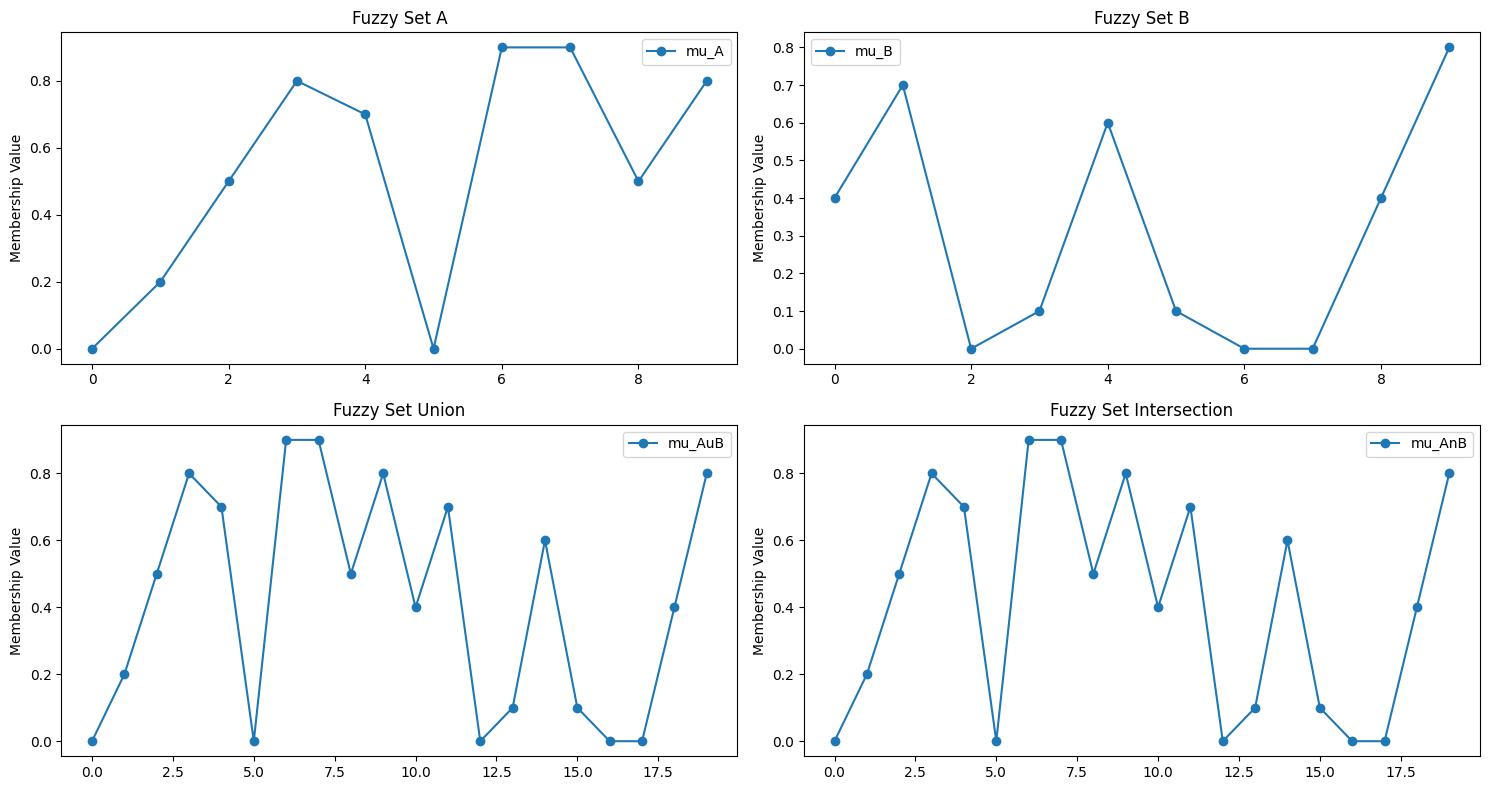

In [7]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

# Plot the data
axs[0, 0].plot(mu_A, marker='o', linestyle='-', label='mu_A')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Membership Value')
axs[0, 0].set_title('Fuzzy Set A')
axs[0, 0].legend()

axs[0, 1].plot(mu_B, marker='o', linestyle='-', label='mu_B')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Membership Value')
axs[0, 1].set_title('Fuzzy Set B')
axs[0, 1].legend()

axs[1, 0].plot(mu_AuB, marker='o', linestyle='-', label='mu_AuB')
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('Membership Value')
axs[1, 0].set_title('Fuzzy Set Union')
axs[1, 0].legend()

axs[1, 1].plot(mu_AnB, marker='o', linestyle='-', label='mu_AnB')
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Membership Value')
axs[1, 1].set_title('Fuzzy Set Intersection')
axs[1, 1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()